In [ ]:
'''
Case Study
Objectives:
1.Provide the learner some more practice for exploratory data analysis. 2.Equip the learner to fit and evaluate a linear regression model.
Questions:
1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.
[Hint: Extract values of a specific column using their labels and use hist method of pyplot]
2. The names of the manufactures are coded using alphabets, create a new column with their full name using the below mapping.
'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'
Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.
[Hint: Try using countplot this time or bar method of pyplot]
3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.
4. Fit a linear regression module and measure the mean squared error on test dataset.
[ Hint: Explore linear models and metrics section of sklearn documentation]
'''

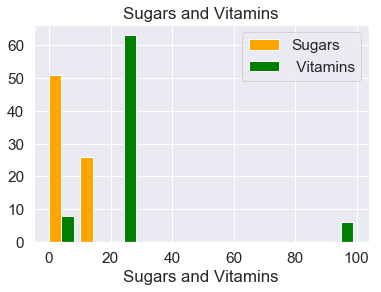

In [10]:
#1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.
#[Hint: Extract values of a specific column using their labels and use hist method of pyplot]

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_6_Introduction_to_Machine_Learning_with_Python/cereal.csv'

df=pd.read_csv(data)

df.head(6)

df_sugar_vitamin=df[['name','sugars','vitamins']]

df_sugar_vitamin.head(6)

#df_sugar_vitamin.info()



plt.hist([df_sugar_vitamin["sugars"], df_sugar_vitamin["vitamins"]],
         color=['orange', 'green'])
plt.title("Sugars and Vitamins")
plt.xlabel("Sugars and Vitamins")
plt.legend(["Sugars", " Vitamins"])
plt.show()


#df_tips['tip'].plot(kind='hist');

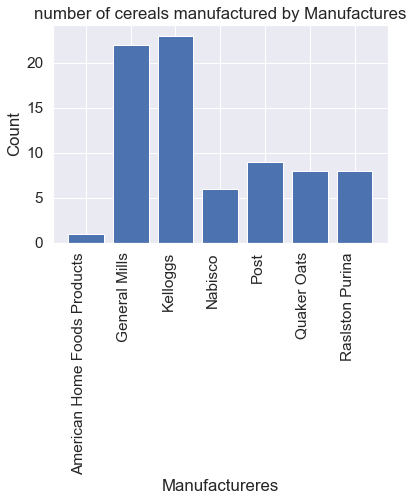

In [11]:
'''
2. The names of the manufactures are coded using alphabets, create a new column with 
their full name using the below mapping.
'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'
Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.
[Hint: Try using countplot this time or bar method of pyplot]

'''

df_cereal=pd.read_csv(data)


dict_mfr = {'N': 'Nabisco',
            'Q': 'Quaker Oats',
            'K': 'Kelloggs',
            'R': 'Raslston Purina',
            'G': 'General Mills',
            'P': 'Post',
            'A': 'American Home Foods Products'
           }

df_cereal["manufactures"] = [dict_mfr[mfr] for mfr in df_cereal["mfr"]]

grouped_mfr = df_cereal.groupby(["manufactures"], as_index=False).count()
x = grouped_mfr["manufactures"]
y = grouped_mfr["mfr"]

plt.bar(x, y)

plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel("Manufactureres")
plt.ylabel("Count")
plt.title("number of cereals manufactured by Manufactures")
plt.show()


In [13]:
#3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. 
#Separate 25% of your data as test set.

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_cereal.iloc[:, 3:15]
Y = df_cereal["rating"]

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=10)




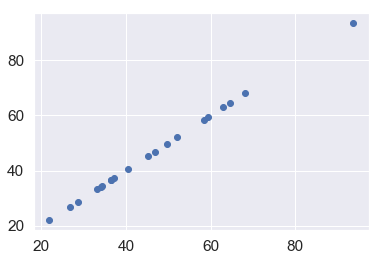

In [14]:
#4. Fit a linear regression module and measure the mean squared error on test dataset.
#[ Hint: Explore linear models and metrics section of sklearn documentation]

liner_model = LinearRegression()
liner_model.fit(x_train, y_train)

predicted_ratings = liner_model.predict(x_test)

plt.scatter(np.array(predicted_ratings), np.array(y_test))
plt.show()